In [7]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy  as np 

In [8]:
# Load the Iris flower dataset
iris = load_iris()
X = iris.data
y = iris.target

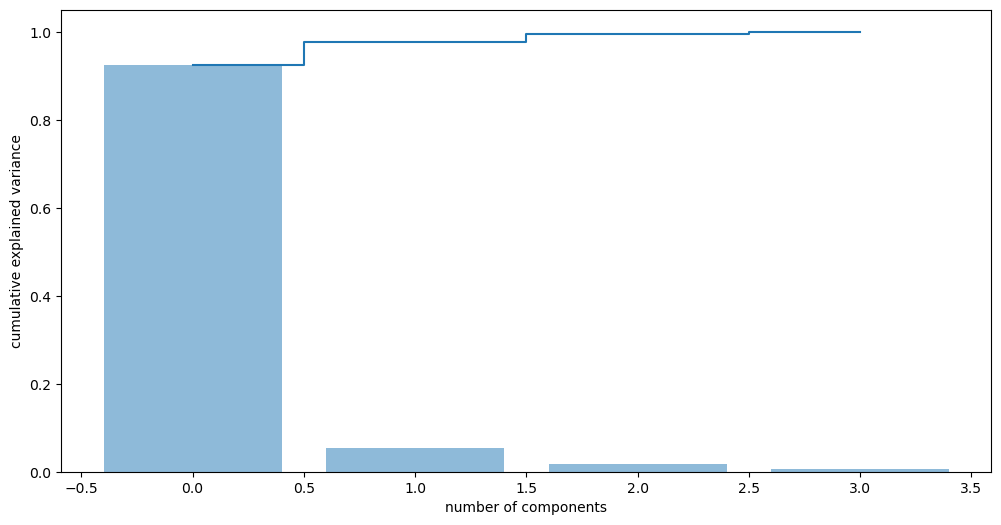

In [9]:
plt.figure(figsize=(12, 6))

pca = PCA().fit(X)  # Notice

plt.bar(range(len(pca.explained_variance_ratio_)),
        pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')

plt.step(range(len(pca.explained_variance_ratio_)),
         np.cumsum(pca.explained_variance_ratio_),
         where='mid')

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [10]:
total_var = np.cumsum(pca.explained_variance_ratio_)

for i in [0, 1, 2, 3]:
    print("Components: {:2d}, total explained variance: {:.2f}".format(i, total_var[i]))

Components:  0, total explained variance: 0.92
Components:  1, total explained variance: 0.98
Components:  2, total explained variance: 0.99
Components:  3, total explained variance: 1.00


In [13]:
n_components=2

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# **Model without PCA**

# Create a KNN model
knn_no_pca = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the original data
knn_no_pca.fit(X_train, y_train)

# Predict the labels of the test data
y_pred_no_pca = knn_no_pca.predict(X_test)

# Calculate the accuracy of the model
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)

print("Accuracy without PCA:", accuracy_no_pca)

# **Model with PCA**

# Apply PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a KNN model
knn_pca = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the reduced-dimensionality data
knn_pca.fit(X_train_pca, y_train)

# Predict the labels of the test data
y_pred_pca = knn_pca.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("Accuracy with PCA:", accuracy_pca)

Accuracy without PCA: 0.8666666666666667
Accuracy with PCA: 0.8666666666666667


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim